### Visualizing the Cleaned Datasets 
**Datasets used in this notebook are produced in the data_cleaning notebook**

In [72]:
#importing :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Loading datasets
items = pd.read_csv("../output/items_cleaned.csv")
orders = pd.read_csv("../output/orders_cleaned.csv")
customers = pd.read_csv("../output/customers_cleaned.csv")

In [74]:
# Standardize column data types for all the datasets
orders = orders.astype({
    "order_id" : str,
    "customer_id" : str,
    "order_status" : str
})
# create a function to speed up the process
def date_time(column) : 
    orders[column] = pd.to_datetime(orders[column])
date_time("order_purchase_timestamp")
date_time("order_approved_at")
date_time("order_delivered_carrier_date")
date_time("order_delivered_customer_date")
date_time("order_estimated_delivery_date")
customers = customers.astype({
    "customer_id" : str,
    "customer_unique_id" : str,
    "customer_zip_code_prefix" : str,
    "customer_city" : str,
    "customer_state" : str
})
items["shipping_limit_date"] = pd.to_datetime(items["shipping_limit_date"])
items = items.astype({
    "order_id" : str,
    "order_item_id" : int,
    "product_id" : str,
    "seller_id" : str,
    "price" : float,
    "freight_value" : float
})

### visualizing the number of orders over time ( monthly / yearly )

#### orders per month :

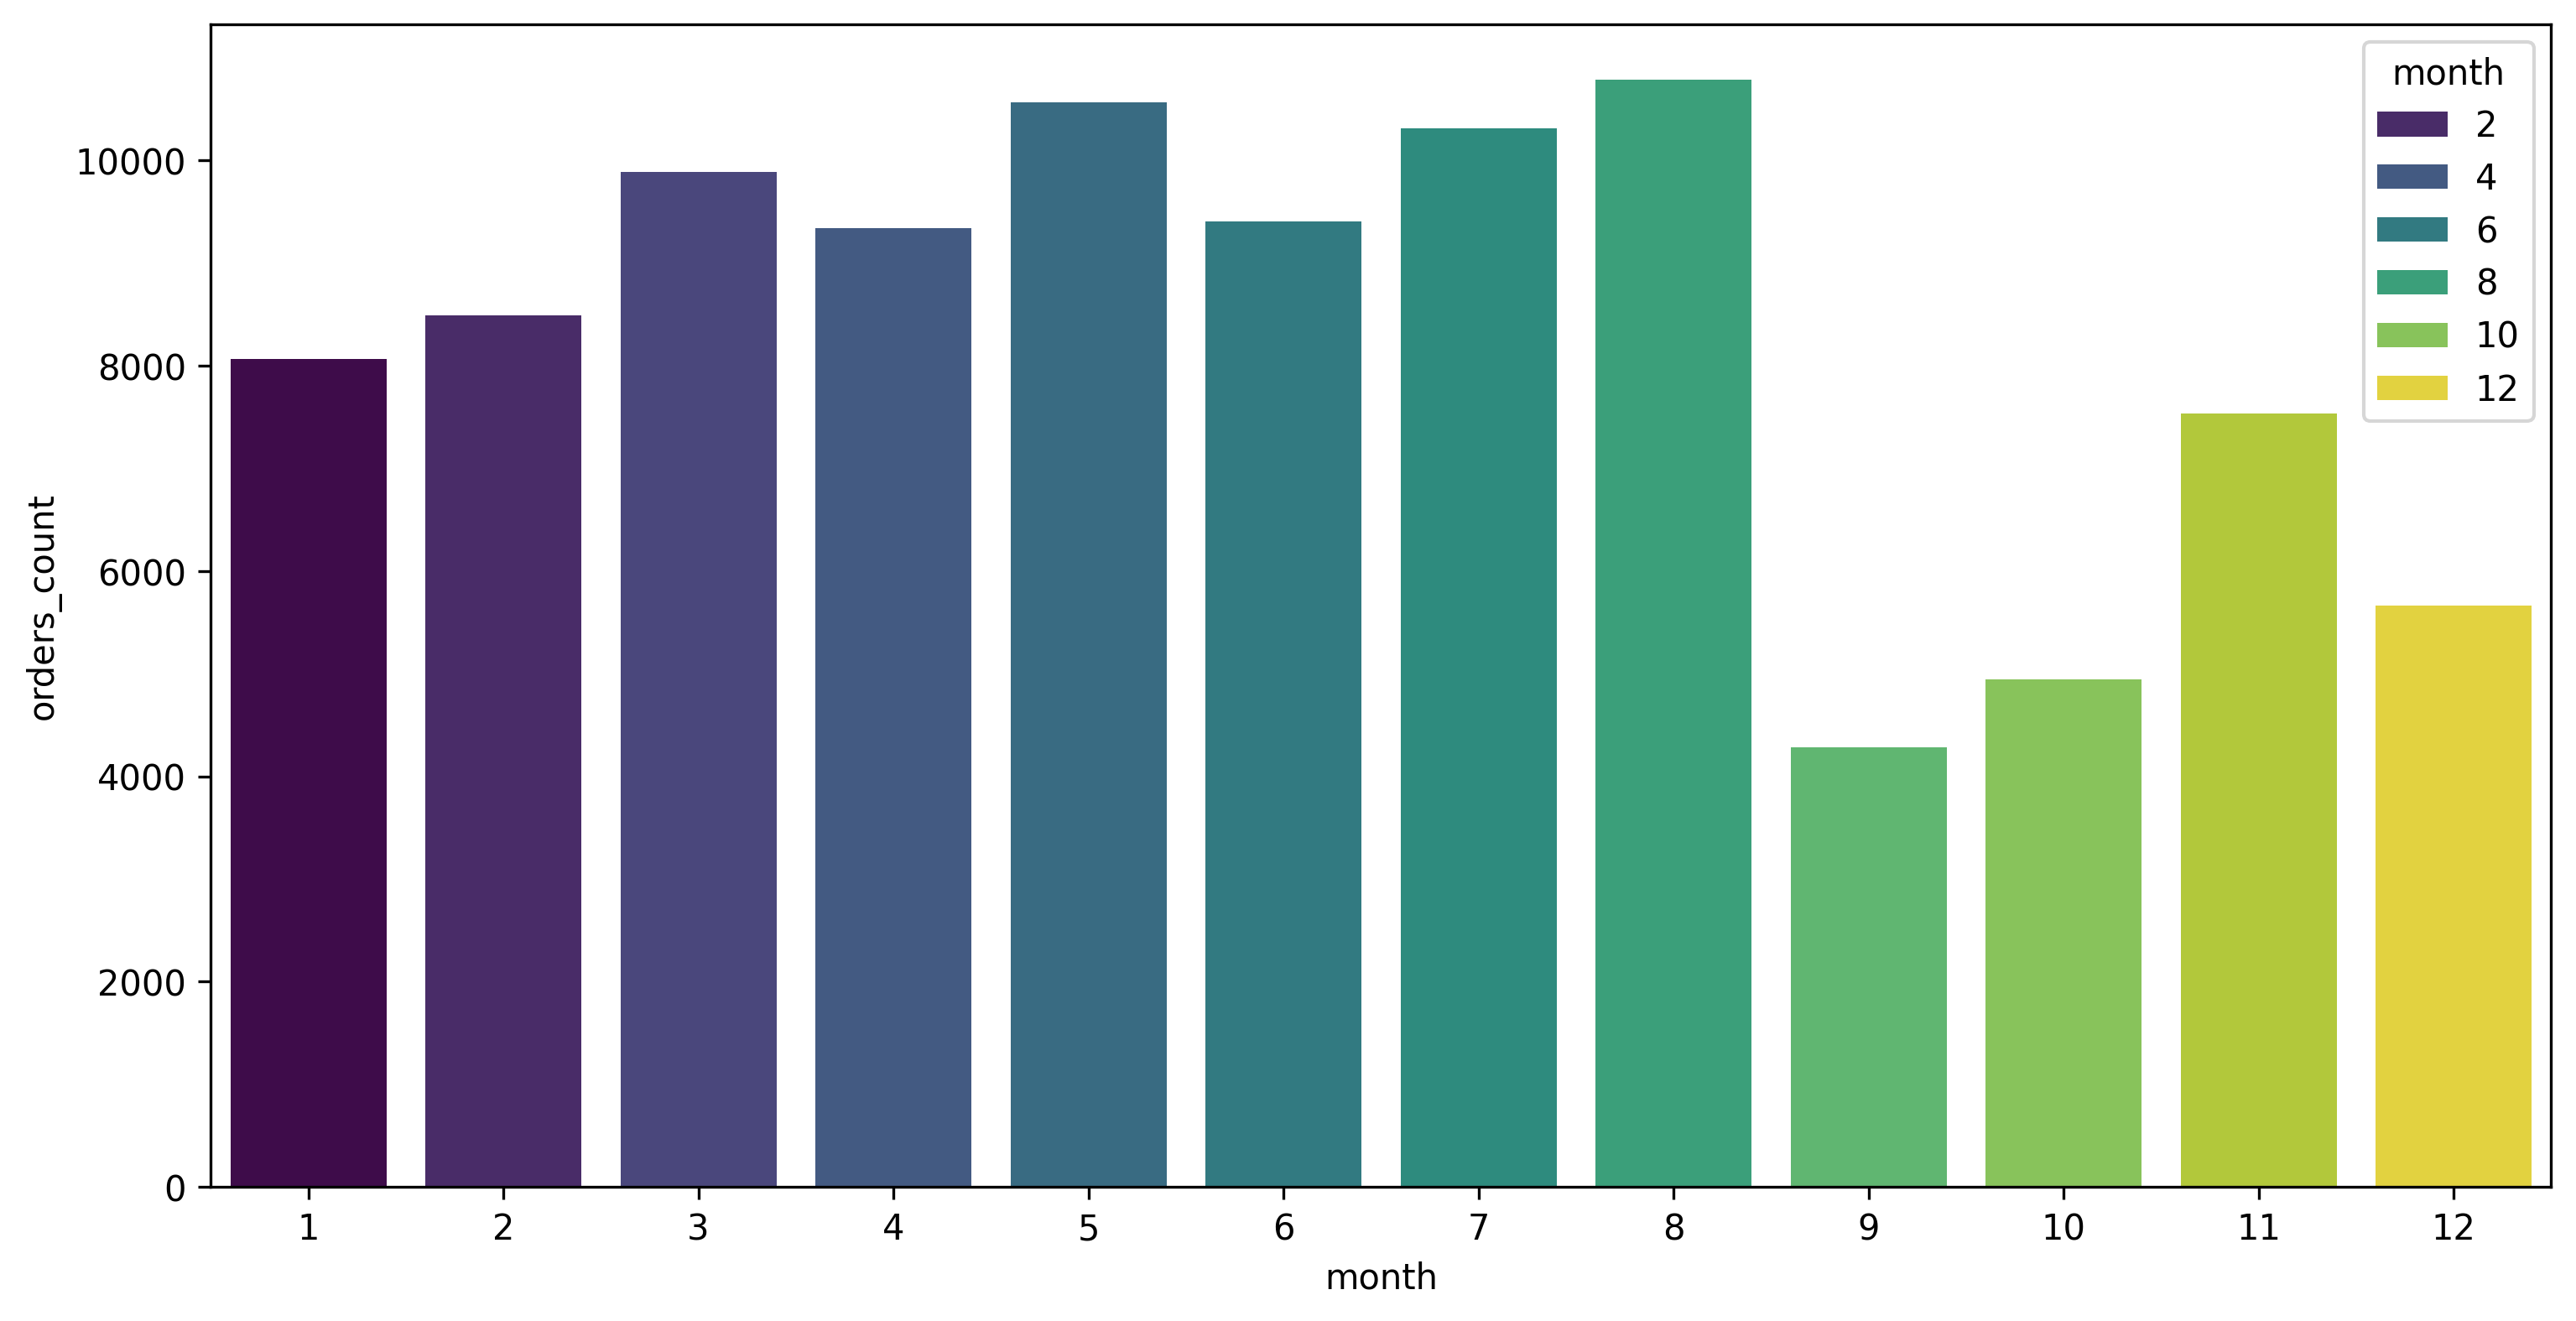

In [75]:
orders["month"] = orders["order_purchase_timestamp"].dt.month
orders_per_month = orders.groupby("month").size().reset_index(name = "orders_count")

fig, ax = plt.subplots(figsize = (12, 6), dpi = 300) 
sns.barplot(data = orders_per_month, x = "month", y = "orders_count", hue = "month", palette = "viridis")
plt.savefig("../output/charts/orders_per_month.png", dpi = 300)

#### orders per year : 

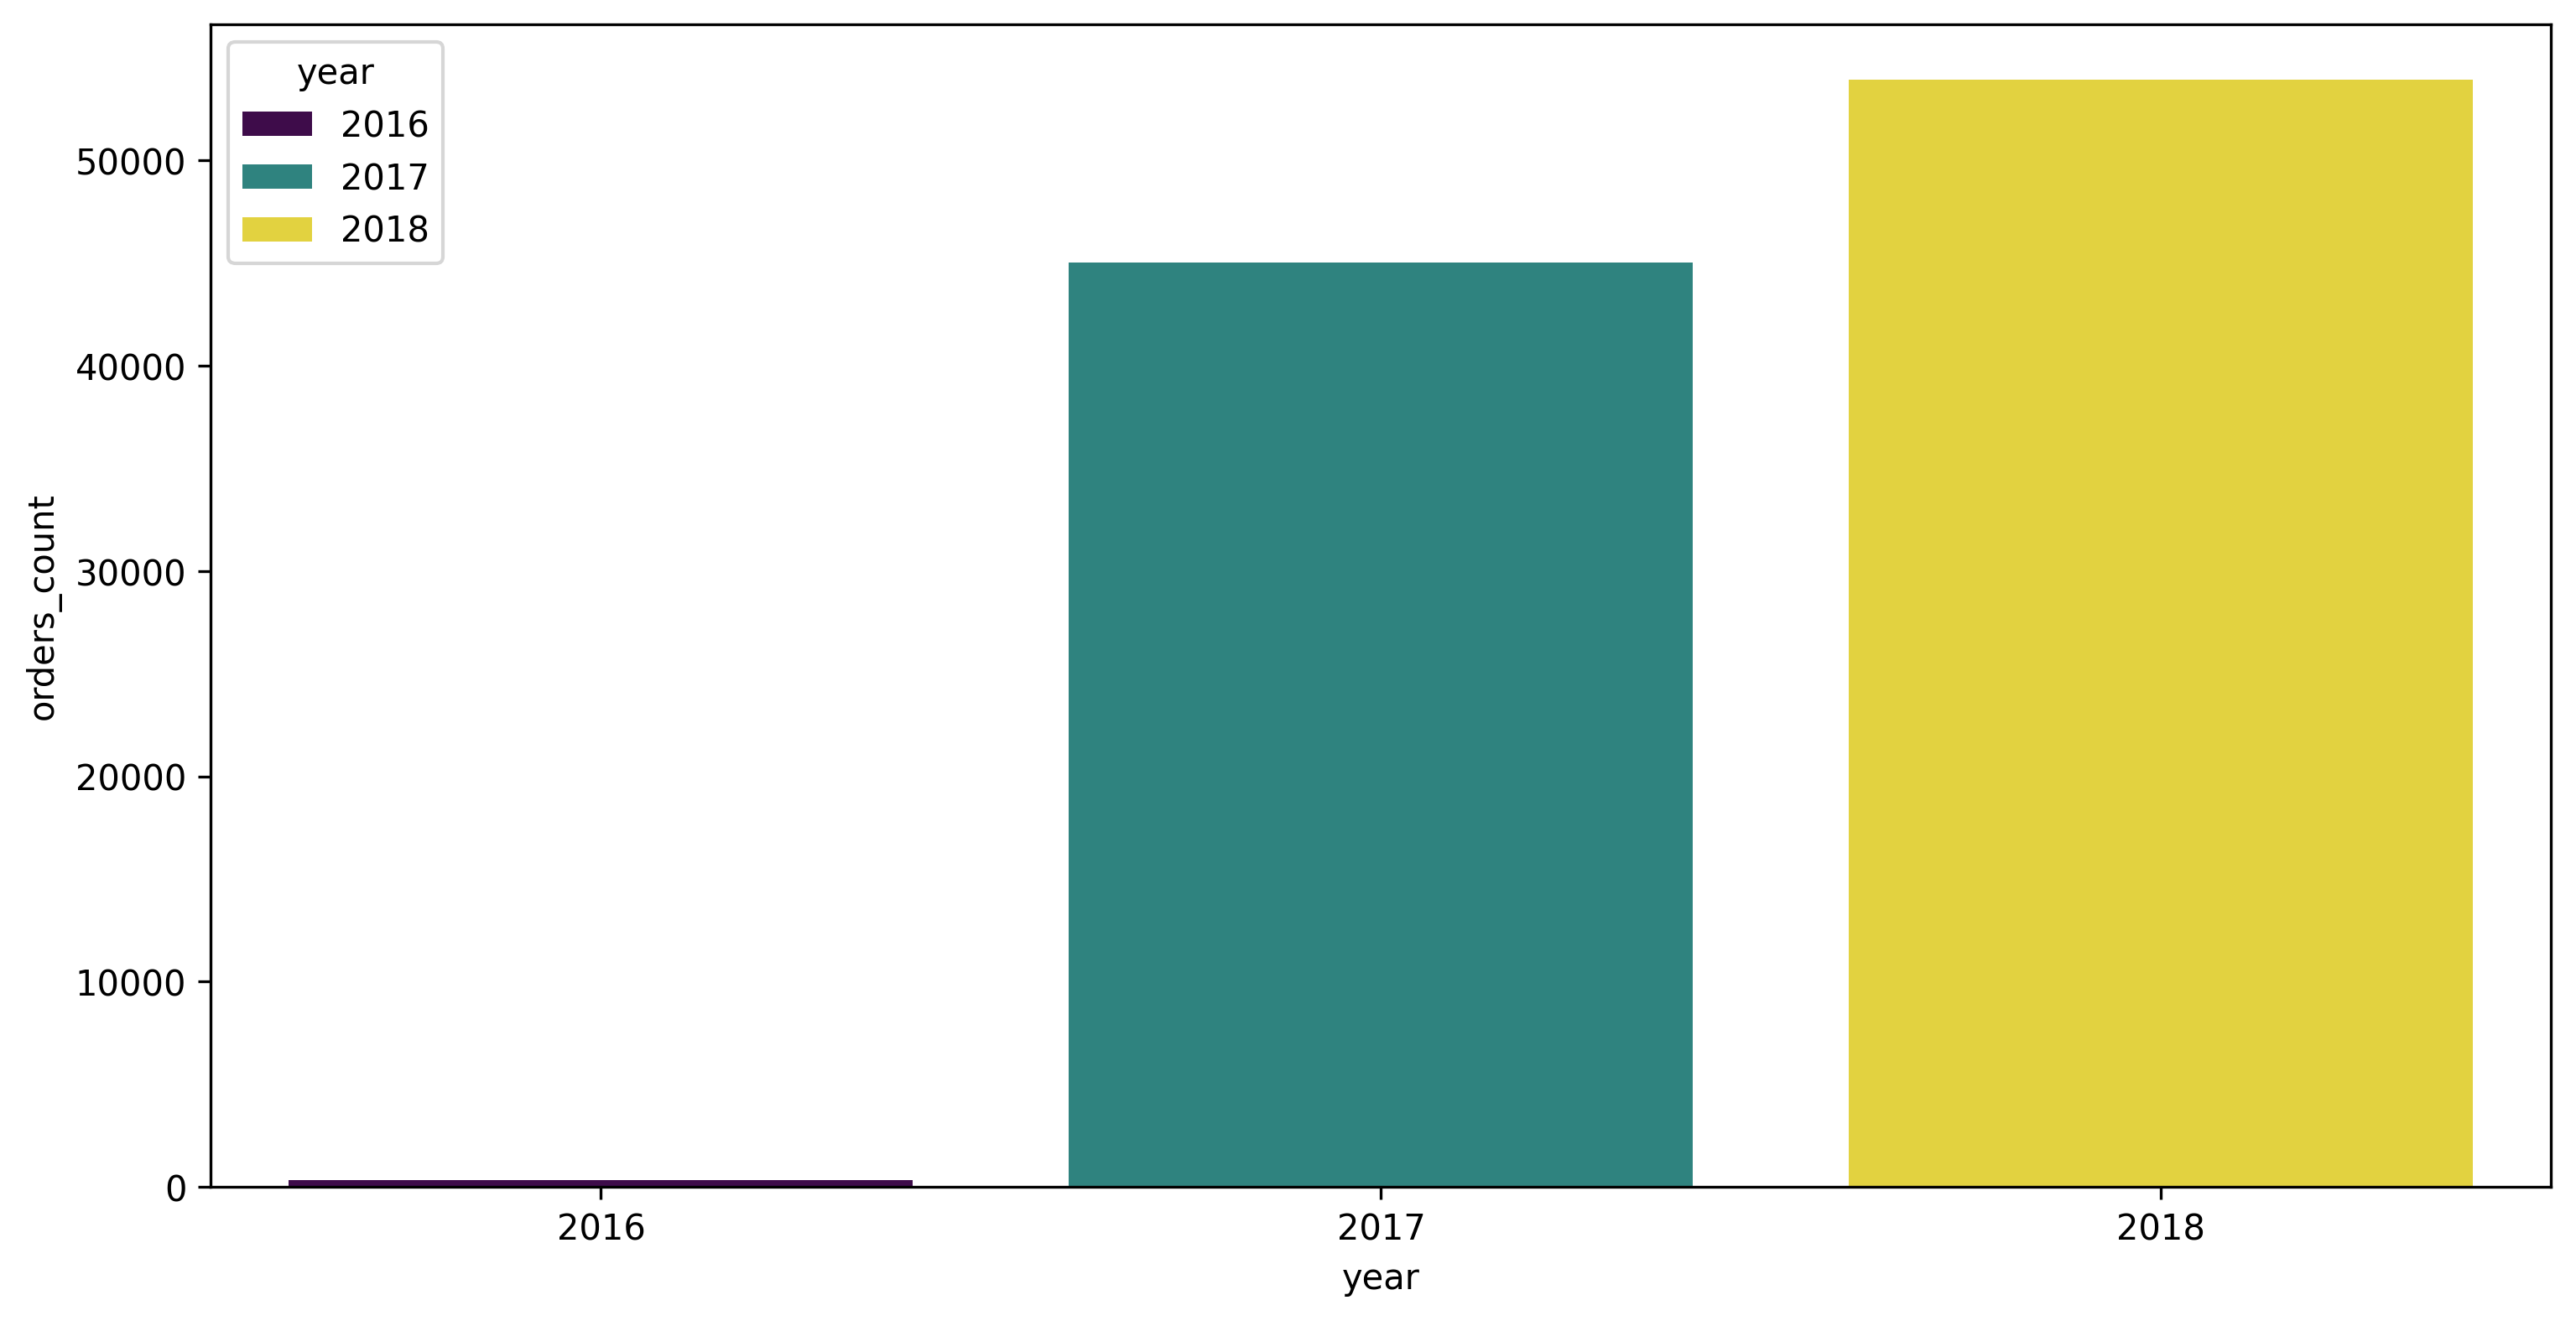

In [76]:
orders["year"] = orders["order_purchase_timestamp"].dt.year
orders_per_year = orders.groupby("year").size().reset_index(name = "orders_count")

fig, ax = plt.subplots(figsize = (12, 6), dpi = 300) 
sns.barplot(data = orders_per_year, x = "year",y = "orders_count", hue = "year", palette = "viridis")
plt.savefig("../output/charts/orders_per_year.png", dpi = 300)

> The number of orders increased dramatically from 2016 to 2017.
In 2016, the platform had very few orders, while in 2017 the number of orders grew approximately 100×, showing a rapid adoption of the service.

### visualizing order status distribution

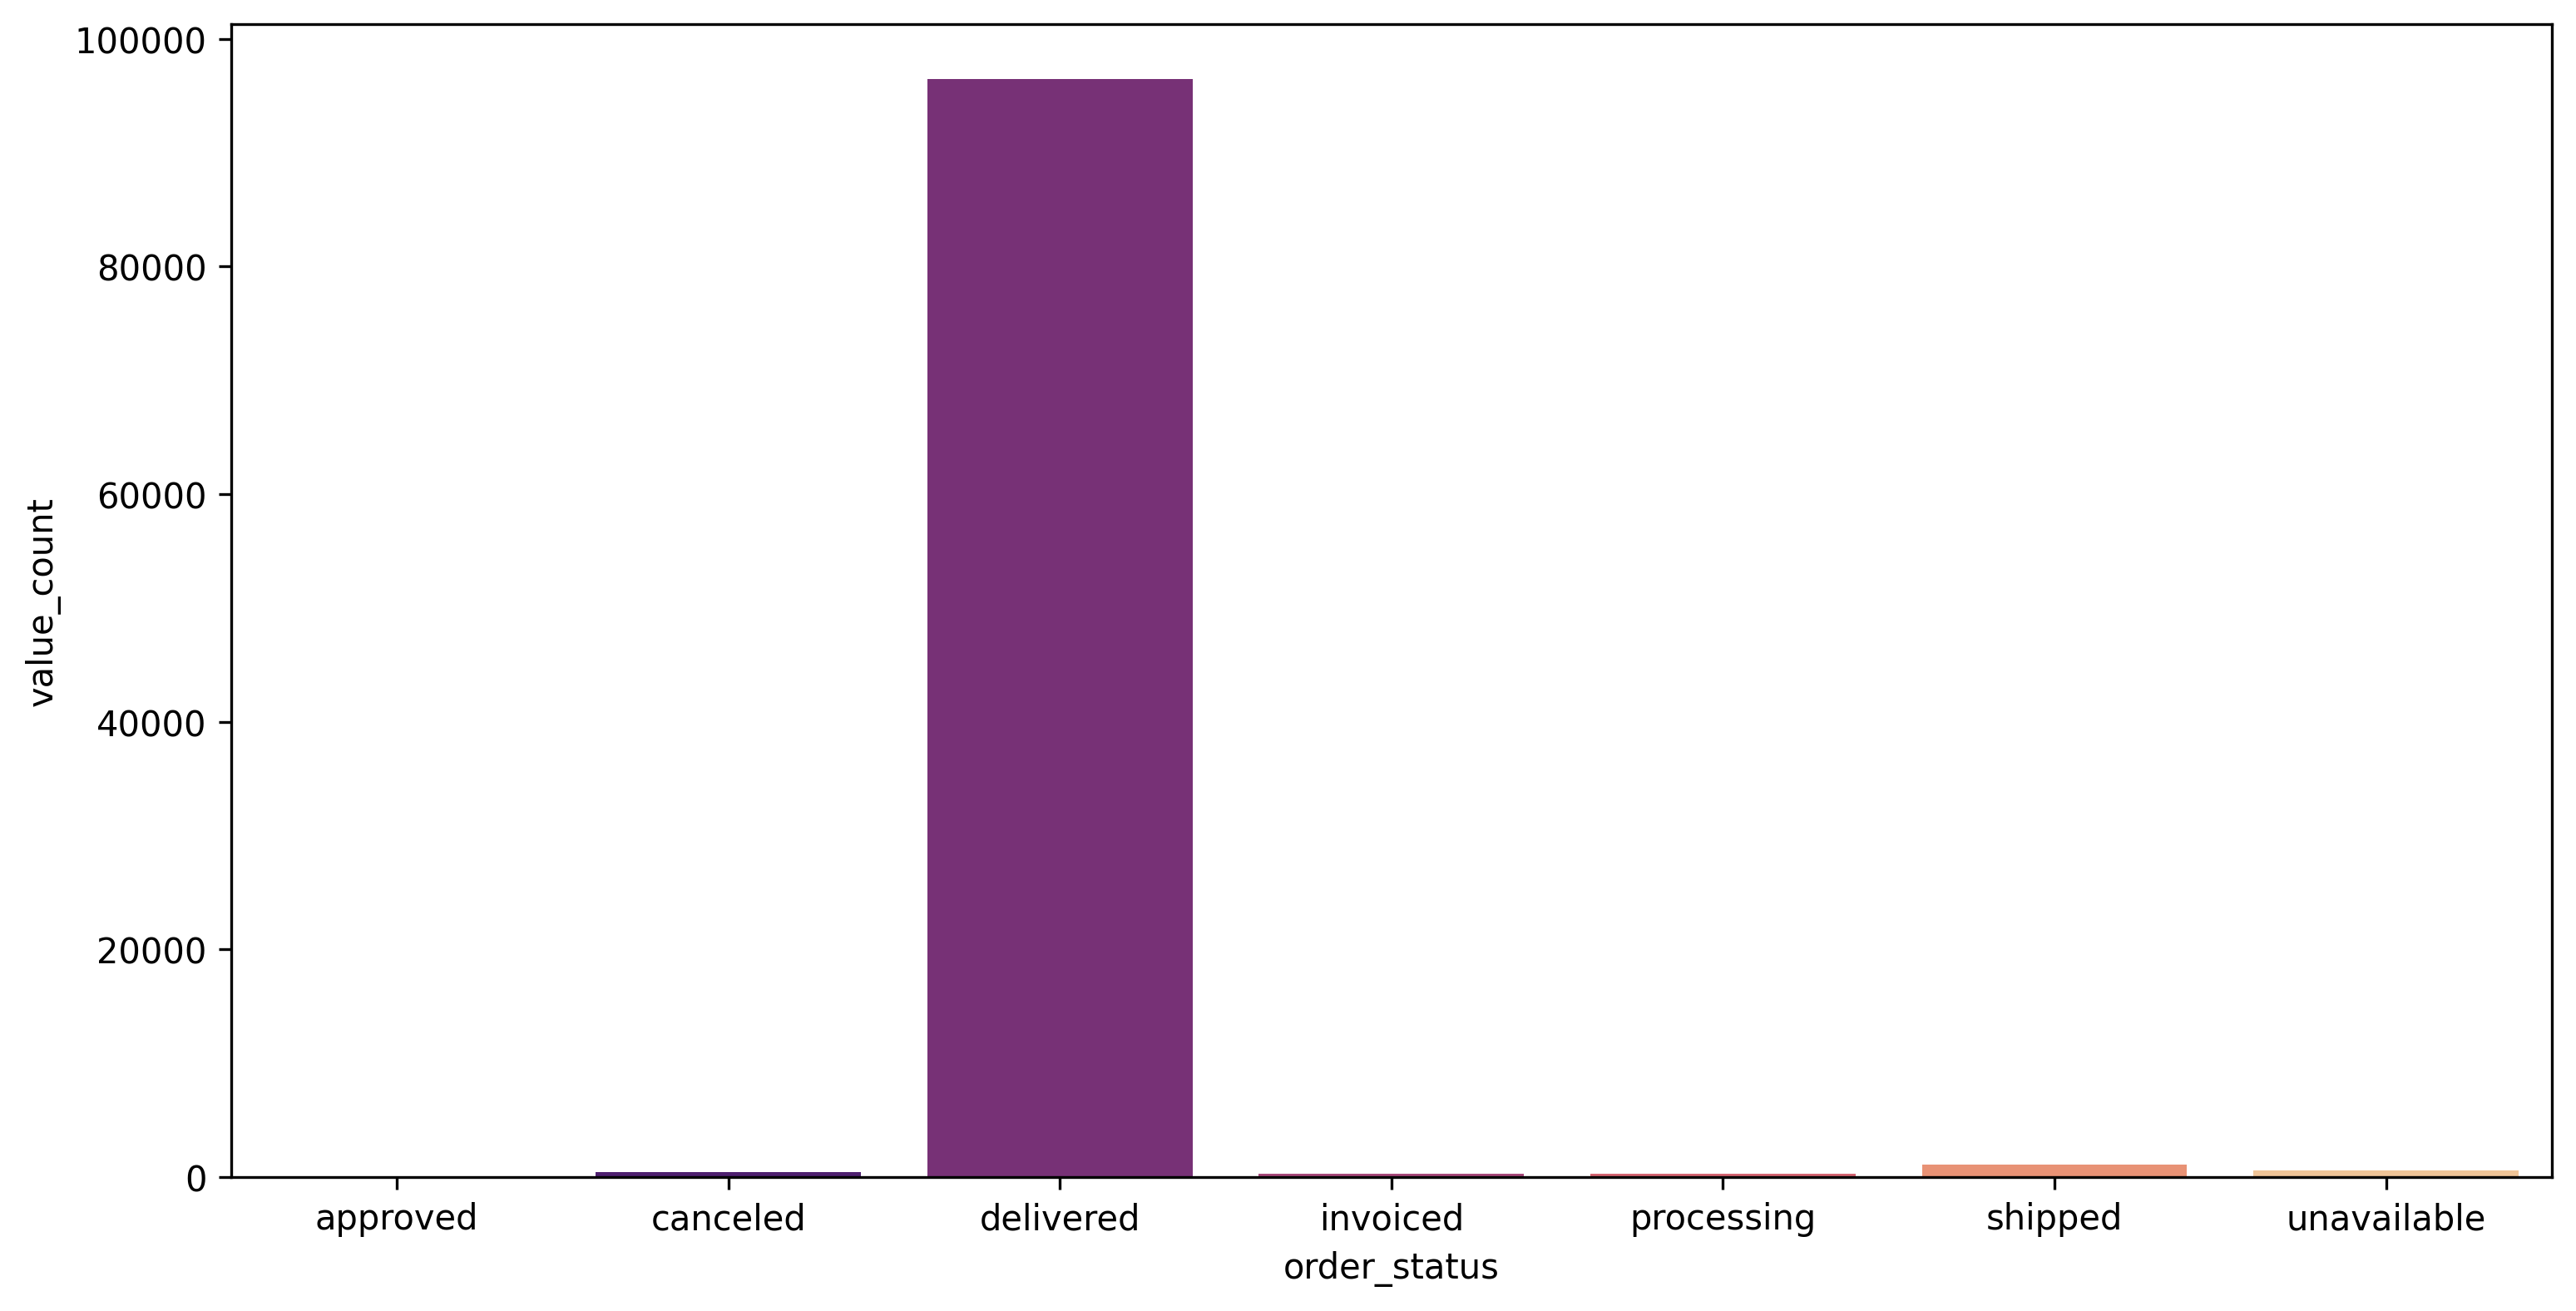

In [77]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300) 
order_status = orders.groupby("order_status").size().reset_index(name = "value_count")
sns.barplot(data = order_status, x = "order_status", y = "value_count", hue = "order_status", palette = "magma") 
plt.savefig("../output/charts/status_distribution.png", dpi = 300)

### visualizing revenue over time 

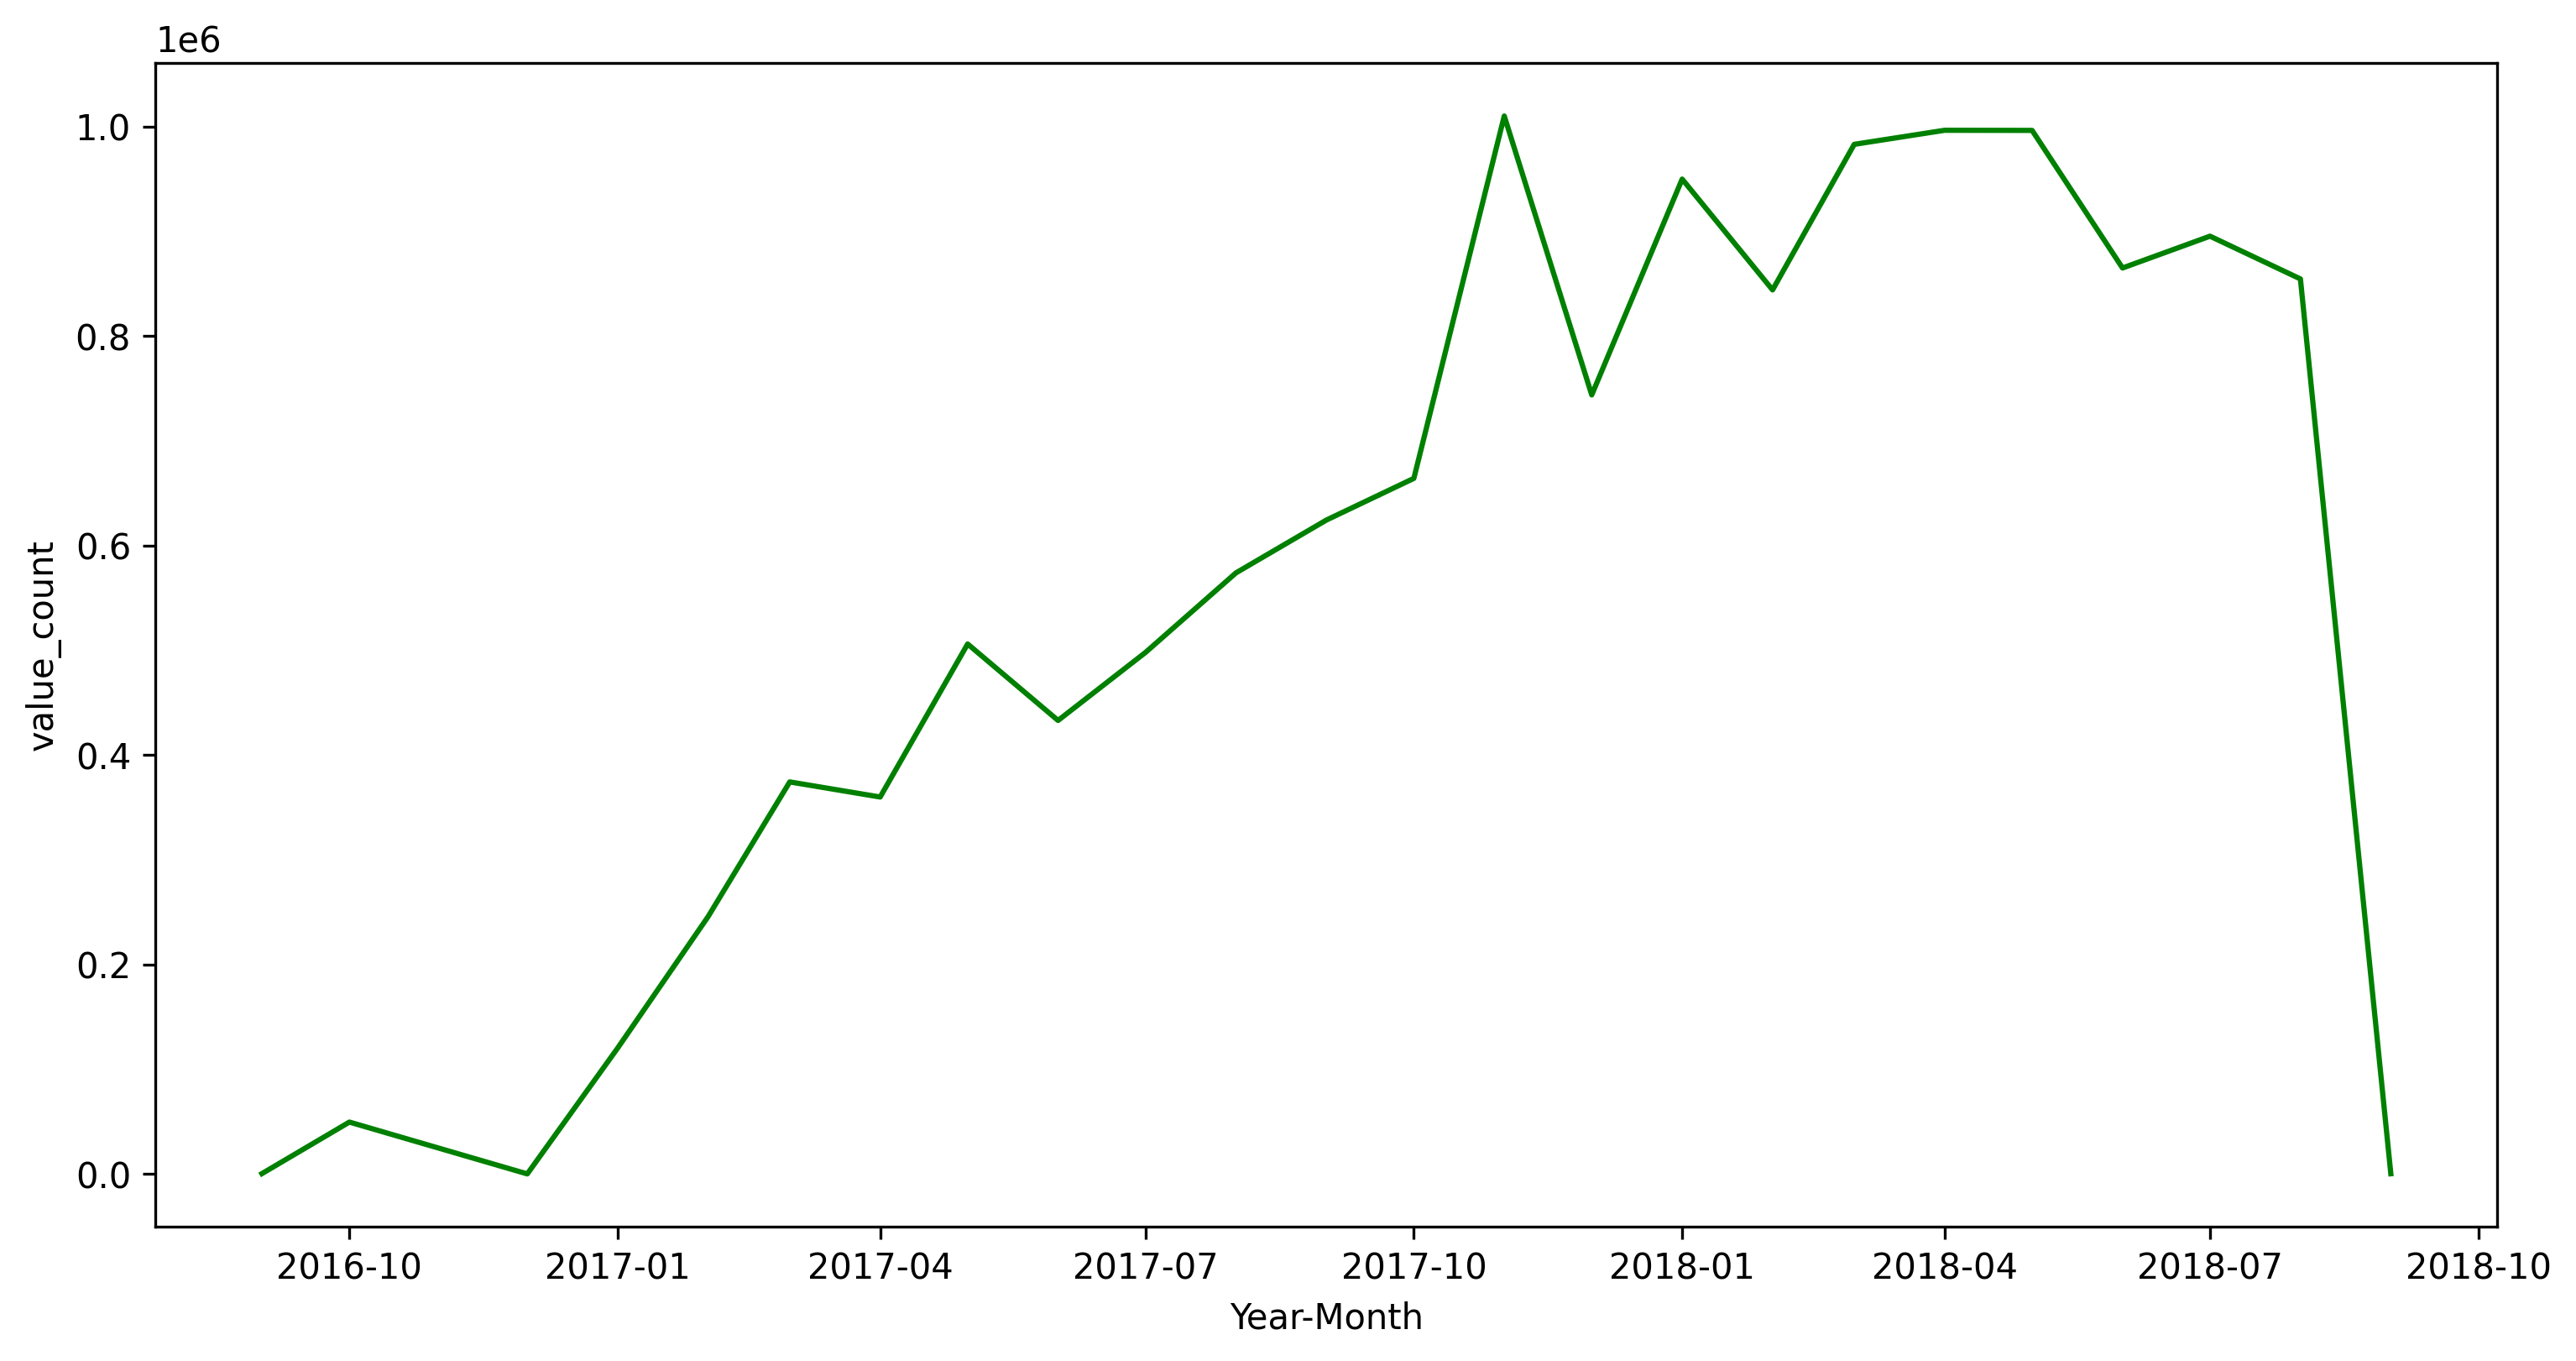

In [78]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300)
orders_items = orders.merge(
    items,
    on = "order_id",
    how = "left" 
)
orders_items["year_month"] = orders_items["order_purchase_timestamp"].dt.to_period("M")
revenue_per_month_year = orders_items.groupby("year_month")["price"].sum().reset_index(name = "value_count")
#converting period to datetime for visualizing :
revenue_per_month_year['year_month'] = revenue_per_month_year['year_month'].dt.to_timestamp()

sns.lineplot(data = revenue_per_month_year, x = 'year_month', y = 'value_count', color = "green")
ax.set_xlabel("Year-Month")
plt.savefig("../output/charts/revenue_over_time.png", dpi = 300)

> - orders had droped dramatically between 2018-07 and 2018-10
> - the period with the highest revenue is between 2017-10 and 2018-01

#### visualizing top products by revenue

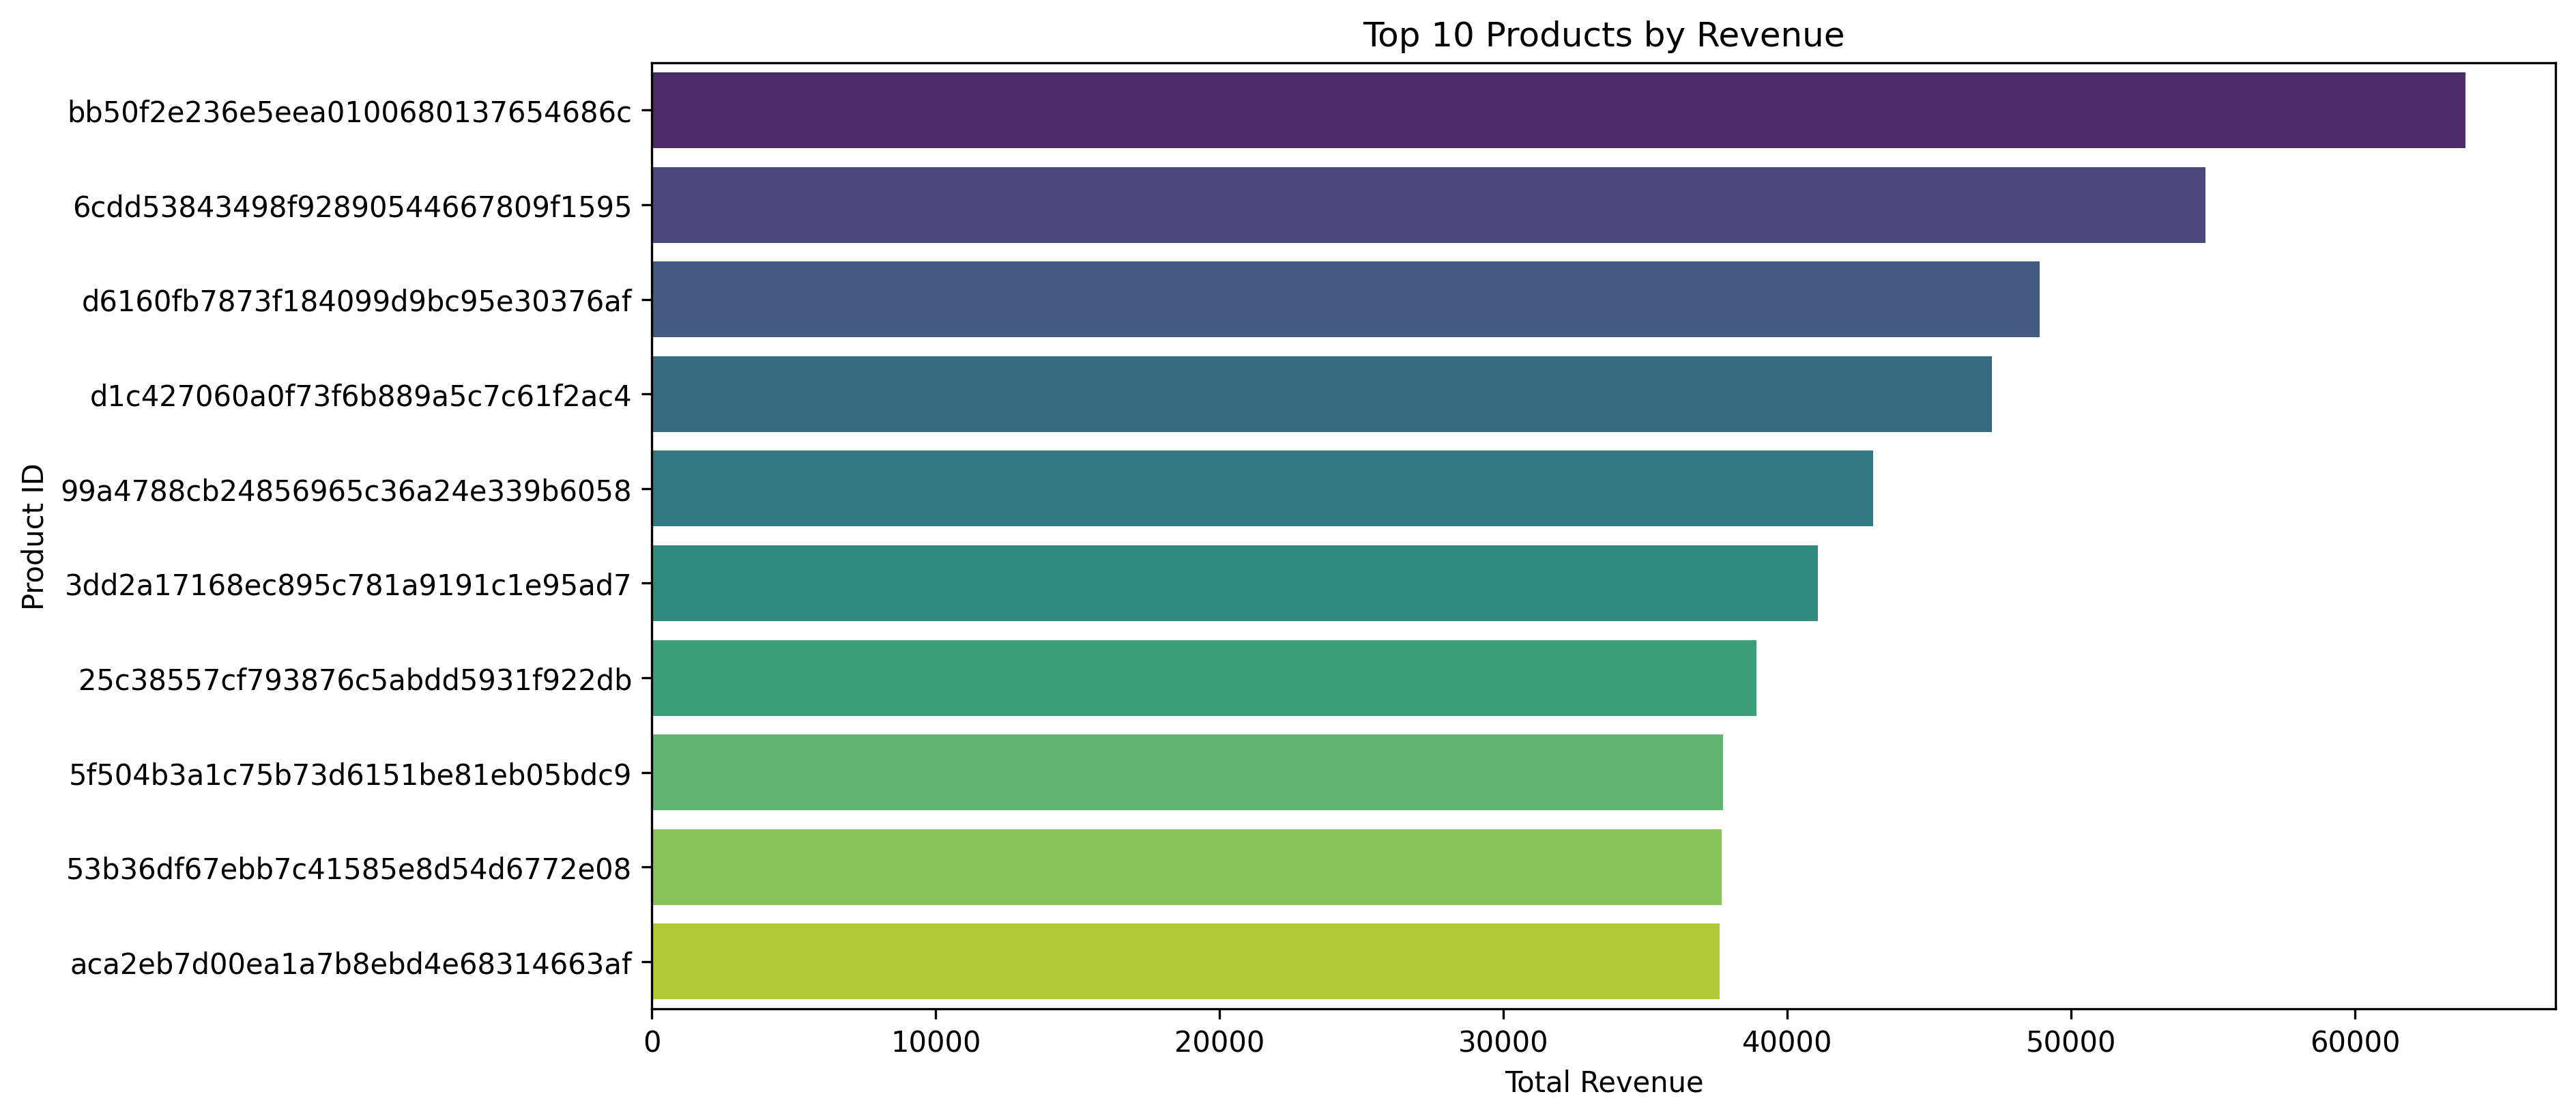

In [79]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300)
top_products = orders_items.groupby("product_id")["price"].sum().reset_index(name = "product_revenue").sort_values(by = "product_revenue",ascending = False)
sns.barplot(data = top_products.head(10) , x = "product_revenue",y = "product_id",hue ="product_id", palette = "viridis")
ax.set_title("Top 10 Products by Revenue")
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Product ID")
plt.savefig("../output/charts/top_products_by_revenue.png", dpi = 300)

#### visualizing top sellers by revenue 

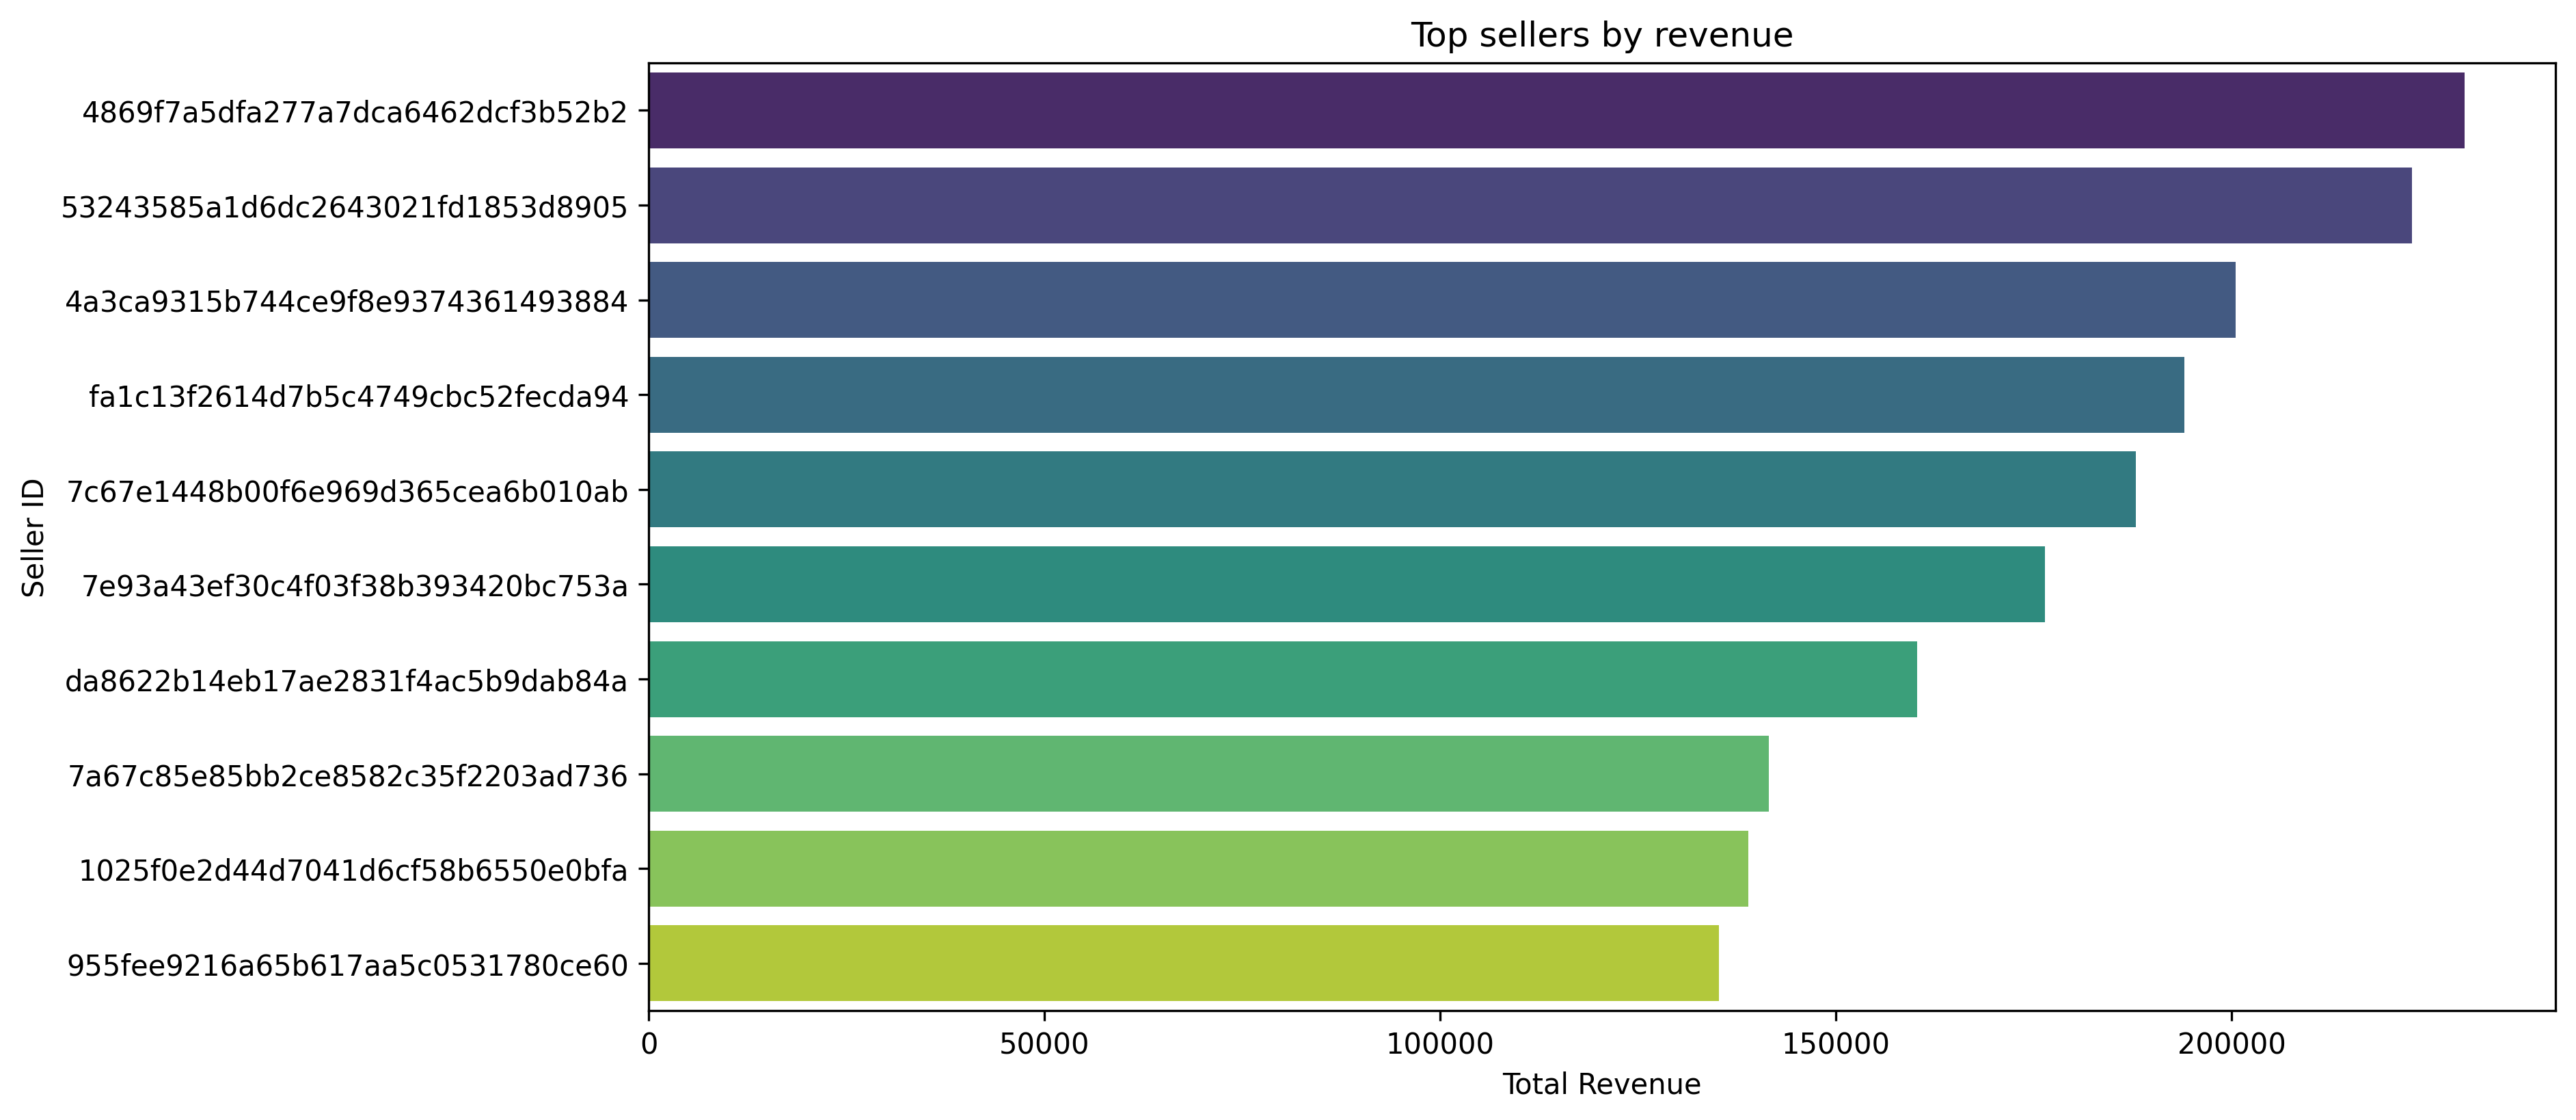

In [81]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300)
top_sellers = orders_items.groupby("seller_id")["price"].sum().reset_index(name = "seller_revenue").sort_values(by = "seller_revenue",ascending = False)
sns.barplot(data = top_sellers.head(10) , x = "seller_revenue",y = "seller_id",hue ="seller_id", palette = "viridis")
ax.set_title("Top sellers by revenue")
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Seller ID")
plt.savefig("../output/charts/top_sellers_by_revenue.png", dpi = 300)

### Visualizing delivery delay distribution

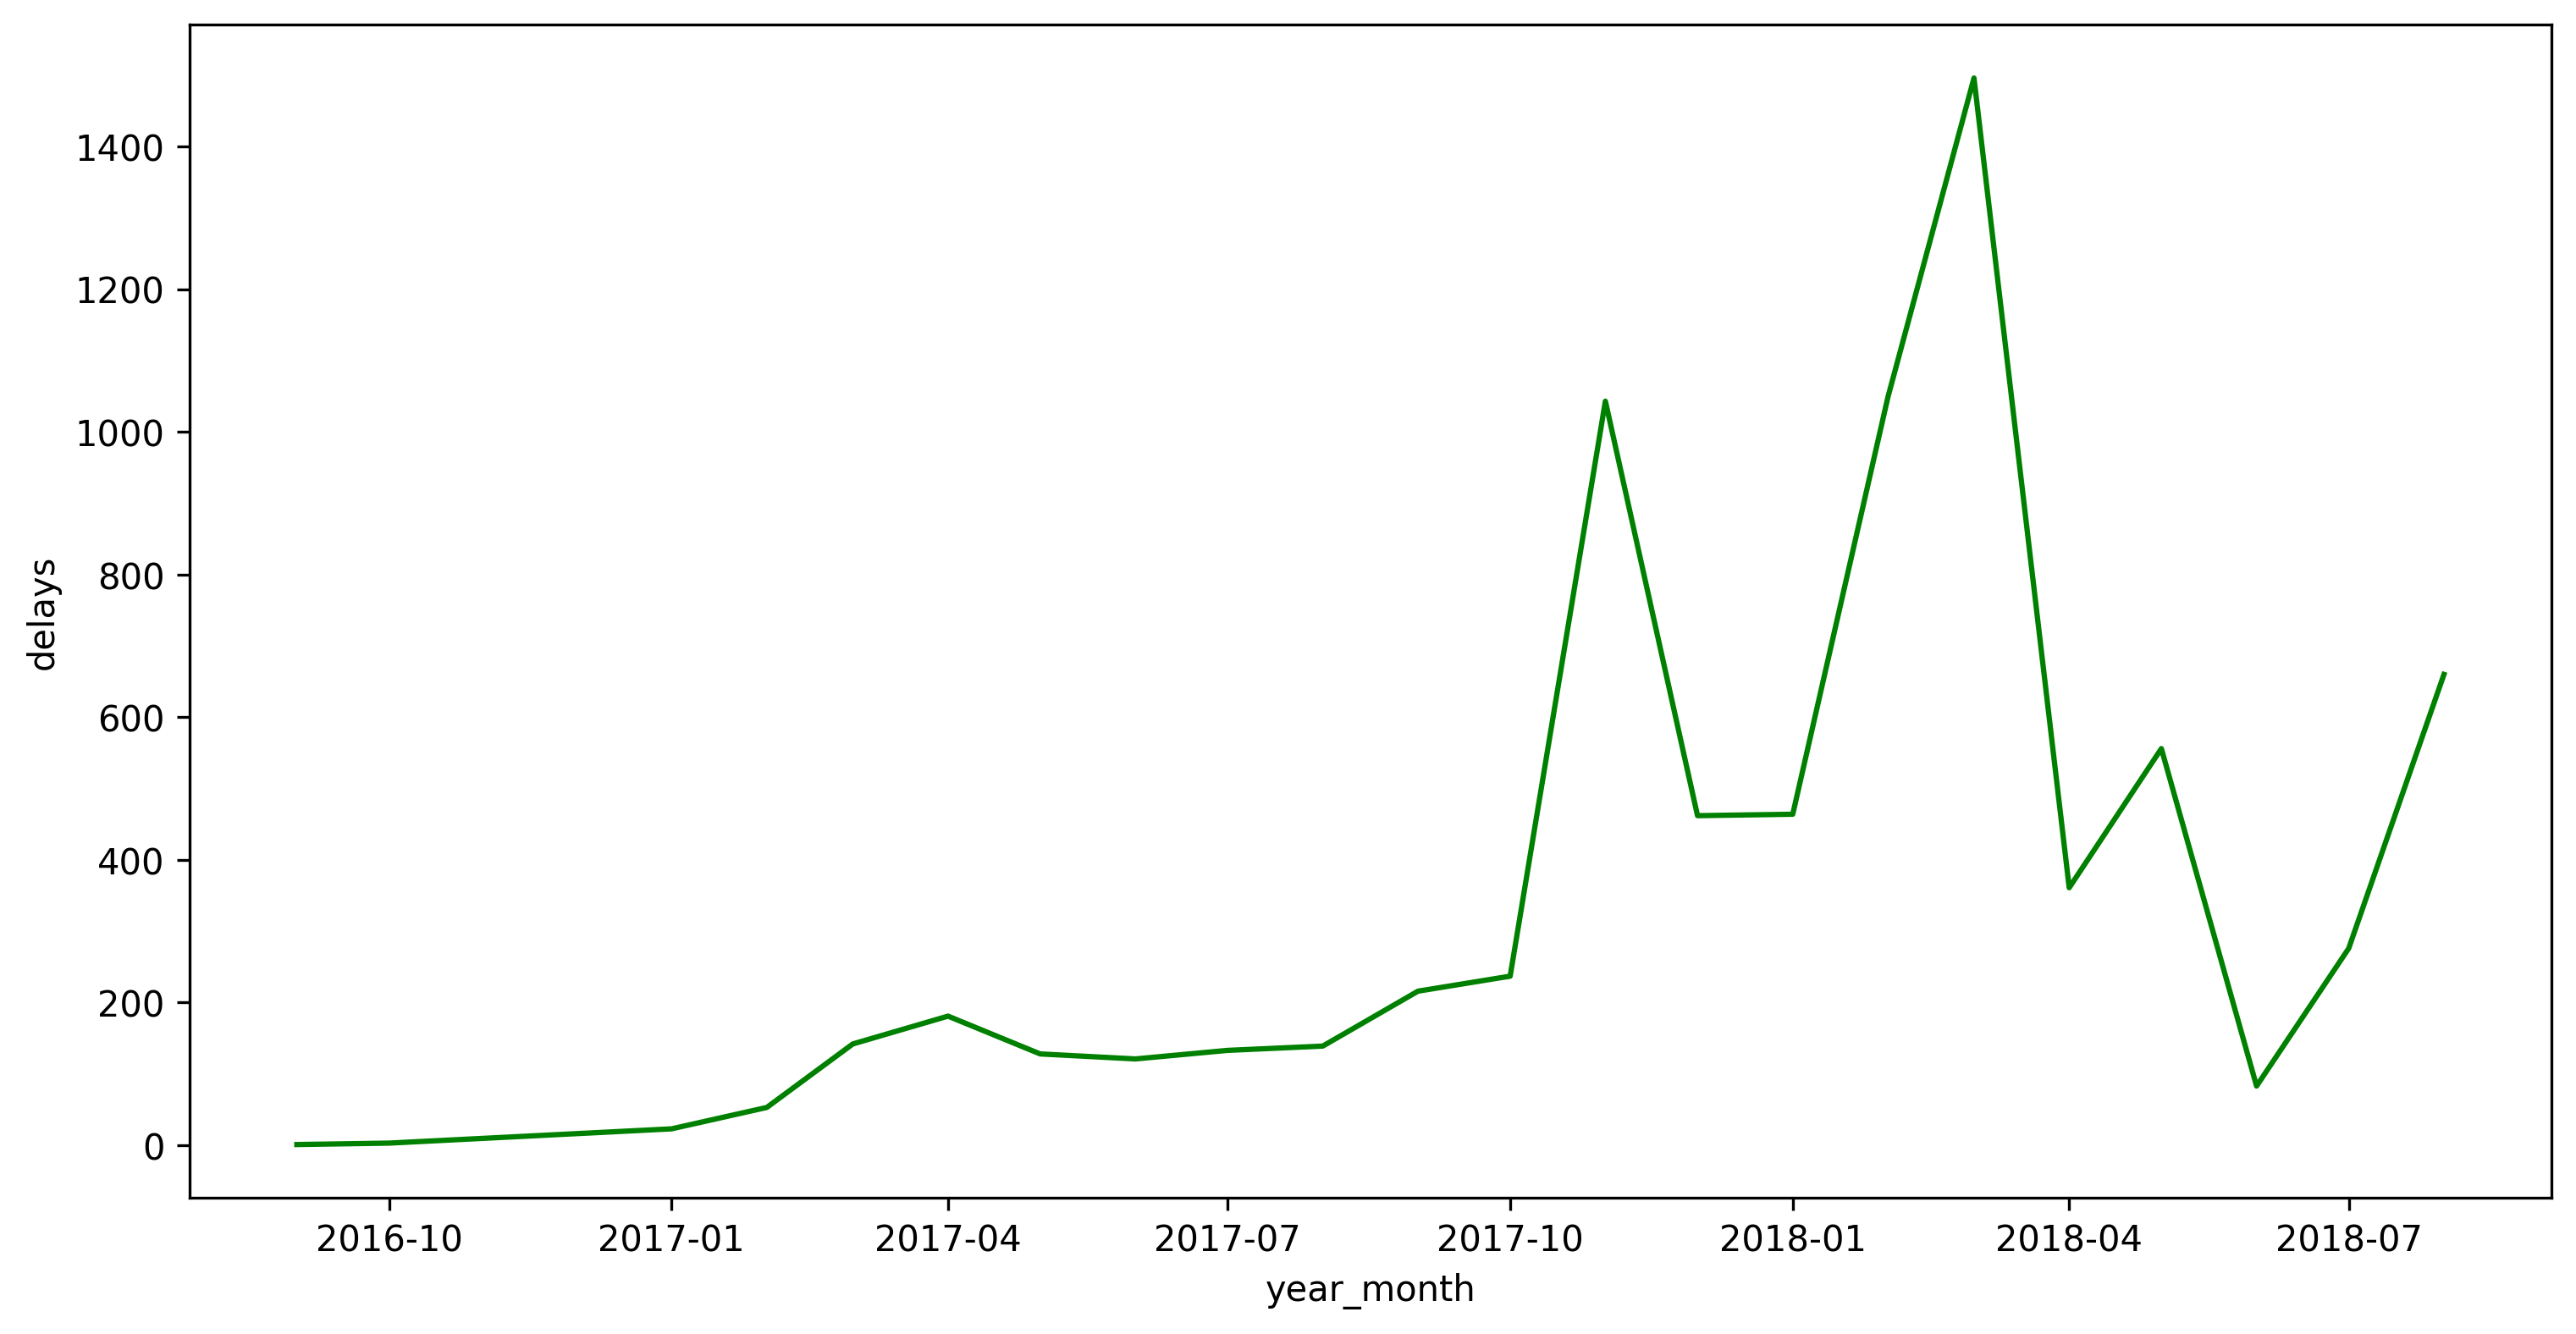

In [94]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300)
orders["year_month"]= orders["order_purchase_timestamp"].dt.to_period("M")
delivery_delay_distribution = orders[orders["order_delivered_customer_date"] > orders["order_estimated_delivery_date"]].groupby("year_month").size().reset_index(name = "delays")
delivery_delay_distribution["year_month"] = (
    delivery_delay_distribution["year_month"].dt.to_timestamp()
)
sns.lineplot(data = delivery_delay_distribution, x = "year_month", y = "delays", color = "green") 
plt.savefig("../output/charts/delivery_delay_distribution.png", dpi = 300)

> - The period with the most delays is between 2018-01 and 2018-04
> - After 2018-04, both orders and the total number of delays decreased.

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300)
 
plt.savefig("../output/charts/on-time_vs_late_deliveries.png", dpi = 300)

### work to do : 
7) Visualize on-time vs late deliveries
8) Visualize average delivery delay over time
9) Visualize orders per customer (repeat vs one-time)
10) Visualize top customers by total spend
11) Visualize customer distribution by location (state/city if available)
12) Visualize most ordered products
13) Visualize sellers with the highest delays
14) Visualize product price distribution
15) Visualize relationship between delivery delay and price   
16) Visualize relationship between order count and revenue
17) Select 3–5 key charts and add a short insight under each


In [82]:
sns.lineplot(data = delivery_delay_distribution, x = "year_month", y = "delays", color = "green") 
plt.savefig("../output/charts/delivery_delay_distribution.png", dpi = 300)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,2018
...,...,...,...,...,...,...,...,...,...,...
99276,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,3,2017
99277,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2,2018
99278,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,8,2017
99279,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,2018
